<h1> Assignment 1</h1>
<ul>
<p>General Info:</p>
<ul>
    <li>**Hand-In Date**: 31st January 2019</li>
    <li>**Hand-In Format**: as jupyter notebook (run once through) AND printed as PDF via e-class. The naming format shold be your studentId_Assignment1.filetype (pdf or ipynb).</li>
    <li>**Late Hand-In Penalty**: -10% of your points per late-day</li>  
    </ul>
<h2>Topics Covered: </h2>
<ul>
This lab covers the topics presented in the first three lecture groups, Introduction, Mathematical foundations and Classical optimization methods.<br />
To sucessfully complete the lab, the student should understand the mechanisms at work behind most classical solvers, have a decent understanding of problem spaces and start to get in touch with the Python 3.X framework and Jupyter Notebook. <br />
    This lab does require some minor programming proficiency in python and some basic lin.alg understanding. You should understand python functions, be able to work with numpy or scipy and for the bonus points matplotlib or any other plotting libary. You should understand how to approximate derivatives, what a hessian matrix is and what problems matrix inversion can raise. <br />

This lab specifically covers, over 4 toy-problems (Taks0), in increasing difficulty: <br /> 
<ul>
    <li> Random Search (Task1)
    <li> Gradient Descend/First Order Methods (Task2)
    <li> Newtonian/Second Order Methods (Task3) 
</ul>

<h3> Disclaimer! </h3>
Do not expect all methods to do extremely well on all toy-problems! The purpose of this assignment is also to motivate the topics covered in this course. Not all methods will be able to find all minima!!!

<h2>Marking Table: </h2>
<ul>
    There is a total of 99 points in this assignment. <br/>
    It is split in 3, equally weighted sections (Task 1-3). <br />
    Each of those sections contains: <br /><ul>
        <li> **Q1, 11 points** for explaining how the respective method works, concisely analyzing what potential issues can arise when choosing to use this technique, and what advantages this technique can offer. To come about those points, please carefully consider how the technique would perform on the toy-problems in Task 0. <br />
        <li> **Q2, 11 points** for implementing the method in code. Points are awarded for code functionality AND readability. The code should be understandable either on it's own (good) or in conjunction with the methodology explanation from Q1 (adequate). <br/>
        <li> **Q3, 11 points** for testing the method on the toy-problems from Task 0, and comparing to what was expected and commenting on any findings. <br/>
        <li> **Additional 7 points** for plotting convergence curves for each problem. This should encourage you to use those convergence curves of for example the algorithm step size or the function values for debugging while programming Q2 and 3. As long as the curves are plotted and issues pointed out, we can award points. HOWEVER THIS IS NOT NEEDED TO REACH FULL MARKS! <br/>
</ul>

In summary you can reach 33 points without programming. <br/>
Expect Task 1 to be easier than Task 2, which is again easier than Task 3. Plan yout time accordingly!
    
<h2>Python Help: </h2>
<ul>
This lab requires matplotlib and numpy, as well as obviously a working jupyter notebook and Python 3.X base. To install both modules, use the pip (or pi3) command within the console as follows:<br />
    <ul>
    for matplotlib: pip install -U matplotlib <br />
    for numpy: pip install -U numpy
    </ul>
    A generally helpful site for ALL programming questions is stackoverflow. Any questions not specifically answered here are likely too specific (OR your TA did not think of them) and should probably be looked up there first.<br/>
    Afterwards, if the question still persists: <br/>
    Either email your TA and wait for an answer (it can take long time since the TA will be basically redoing the same steps you, hopefully, did). **OR BETTER** get proactive and if you really do not manage to find anything after proper reflection and search then feel free to explain where you looked, what your problem is and your TA might be able to answer faster due to understanding your problem better and not having to retrace your search path as well :-)
    


<h2> Task 0, Preparation </h2>
<ul>
    <li> Run the following first cell to define the four toy problems you will be dealing with.
    <li> Then run the following second cell to plot the surfaces of all 4 functions. 
    <li> Take a second to consider those functions and what the problematic properties of those are. 
    <li> This will be important in the subsequent tasks!
</ul>
Each function takes two inputs, x and y. For convenience, x and y have to be either **BOTH** one dimensional vectors and the output will be a corresponding grid, or points and the output will be a single point. So x=[1,2,3], y=[1,2,3] will work, as well as x=1, y=1, but **not** x=[1,2,3] and y=1. 


In [1]:
import numpy as np # importing numpy as symbolic np in order to use those functions

def toy_problem_0(x, y):
    w1= 0.3
    w2 = 0.3
    # to prevent any integer issues
    x = np.array(x)
    y = np.array(y)
    # if only one value is provided (pointwise)
    if x.shape == () and y.shape == ():
        z = x**2 + y**2
        return z
    # else we are dealing with an array of values, as for example plotting or maybe a population
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = x[_x]**2 + y[_y]**2
        return z

def toy_problem_1(x, y):
    w1= 0.3
    w2 = 0.3
    # to prevent any integer issues
    x = np.array(x)
    y = np.array(y)
    # if only one value is provided
    if x.shape == () and y.shape == ():
        z = np.sqrt(x**2 + y**2)
        return z
    # else we are dealing with an array of values, so let's do that
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = np.sqrt(x[_x]**2 + y[_y]**2)
        return z

def toy_problem_2(x, y):
    w1= 0.45
    w2 = 0.5
    x = np.array(x)
    y = np.array(y)
    if x.shape == () and y.shape == ():
        case1 = np.sqrt(x**2 + y**2)-np.pi/(w1*w2)
        case2 =(np.sqrt(x**2 + y**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(x**2 + y**2))
        if case1 >= 0:
            z = case1
        else:
            z = case2
        return z
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                case1 = np.sqrt(x[_x]**2 + y[_y]**2)-np.pi/(w1*w2)
                case2 =(np.sqrt(x[_x]**2 + y[_y]**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(x[_x]**2 + y[_y]**2))
                if case1 >= 0:
                    z[_x, _y] = case1
                else:
                    z[_x, _y] = case2
        return z

def toy_problem_3(x, y):
    w1= 0.45
    w2 = 0.5
    x = np.array(x)
    y = np.array(y)
    if x.shape == () and y.shape == ():
        z = np.sqrt(x**2 + y**2) - 1/(w1*w2)*np.cos(w1*x)*np.cos(w2*y)
        return z
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = np.sqrt(x[_x]**2 + y[_y]**2) - 1/(w1*w2)*np.cos(w1*x[_x])*np.cos(w2*y[_y])
    return z

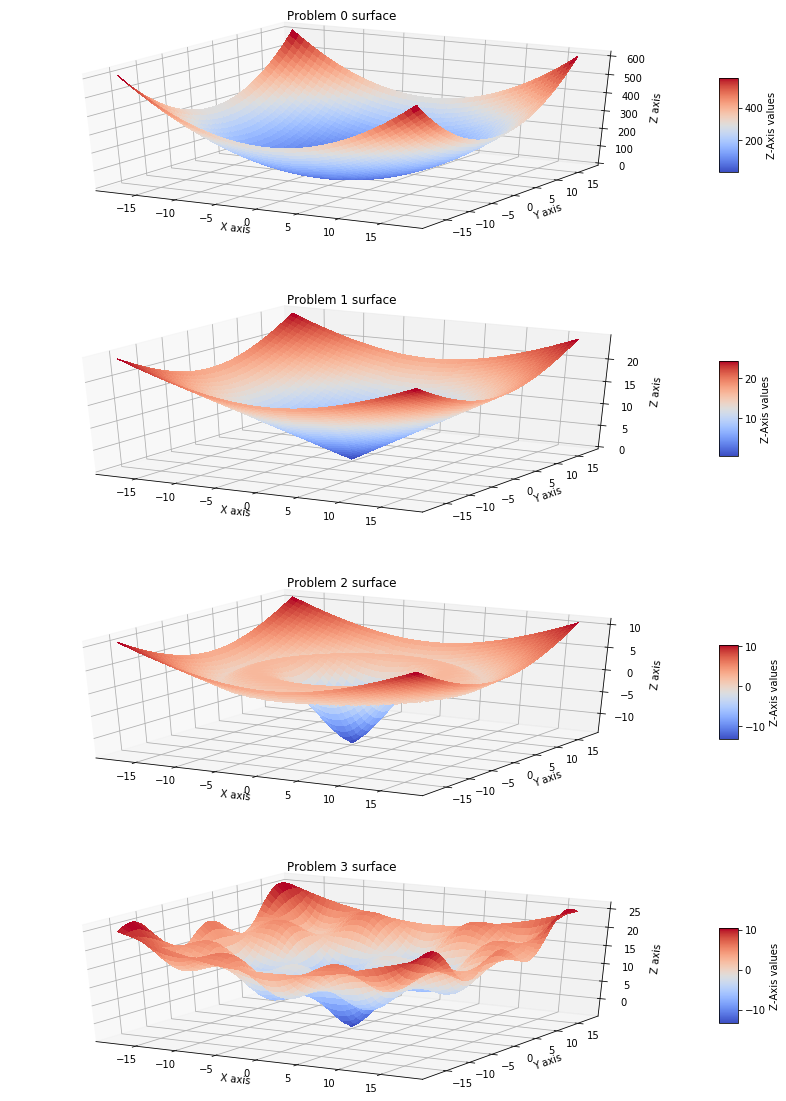

In [3]:
# Plot some nice plots for everyone to see
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# how many steps and at what resolution do I want to plot
steps = 350
x = 0.1*np.arange(-steps/2, steps/2)
y = 0.1*np.arange(-steps/2, steps/2)
X, Y = np.meshgrid(x, y)

# defining the figure parameters
fig = plt.figure(figsize=(15,20))

# first subplot of four
ax1 = fig.add_subplot(411, projection='3d')
surf1 = ax1.plot_surface(X, Y, toy_problem_0(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('Problem 0 surface')
fig.colorbar(surf1, shrink=0.4, aspect=5, label='Z-Axis values')

# second subplot of four
ax2 = fig.add_subplot(412, projection='3d')
surf2 = ax2.plot_surface(X, Y, toy_problem_1(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf2,  shrink=0.4, aspect=5, label='Z-Axis values')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('Problem 1 surface')

# third subplot of four
ax3 = fig.add_subplot(413, projection='3d')
surf3 = ax3.plot_surface(X, Y, toy_problem_2(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf3, shrink=0.4, aspect=5, label='Z-Axis values')
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.set_title('Problem 2 surface')

# fourth subplot of four
ax4 = fig.add_subplot(414, projection='3d')
surf4 = ax4.plot_surface(X, Y, toy_problem_3(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf3, shrink=0.4, aspect=5, label='Z-Axis values')
ax4.set_xlabel('X axis')
ax4.set_ylabel('Y axis')
ax4.set_zlabel('Z axis')
ax4.set_title('Problem 3 surface')

# and show plots
plt.show()

<h2> Task 1, Random Search: </h2>
<ul>
    *In Task 1, you are to implement a random search method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(15,15).*  <br/>
    Task 1 holds 33 (+7) points overall. <br/>
    
<li> **T1Q1, 11 Points**: Explain in words, concisely. <br/>
How does a random search work? <br/>
How would you go about implementing a random search in code? <br/>
In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using random search?) <br/> </li>
         
<li>**T1Q2, 11 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T1Q3, 11 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected? Can you come up with explanations for that behavior?</li>
<li>**BONUS, up to 7 Points**: Plot convergence curves, for for example the function value or the step-size and discuss based on those </li>
</ul>

<h3> TIPs: </h3>
<ul>
    <li> Python itself and numpy do have a plethorra of random number generators, google and chose one that fits your requirements best.
     </ul> 

*__T1_Q1__* <br/>
<li>(1) How does a random search work? <br/>
<ul>Random search is a method that randomly choose some data points to find the optimized value from those chosen data points. For example, ramdomly choose 100 sets of data points(x, y). In these 100 data points, search for the poimt (x,y) that gives the optimized value. In this homework, we'll find the minimum value for each toy problem using random search.<br/>
</ul>
<li>(2) How would you go about implementing a random search in code?<br/>
<ul>First, I'll use python function to generate a set of random points(x, y). For each point, caculate its output value. Set the first random point (x, y) value as "minimum value", and continue searching the value for every random point(x, y). If the value is smaller then "the minimum value", then set the value to "minimum value".<br/>
</ul>
<li>(3) In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using random search?<br/> 
<ul>Since random search is a method that "randomly" choose the points, these random points will also uniformly scattered through the whole function(data space). Once we generate more random points, e.g. 100000 data points instead of 10 points, we are more likely to find the "minimum point" or the point that is really close to the minima point. On the other hand, random searh will not cause much calculation and it's not computational, which means in some situations, it's a pretty good method.<br/>

In [4]:
# T1_Q2
def RandomSearch(problem, x, y, x_best, y_best):
    random_num = 1000
    
    x_prime = np.random.choice(x, size=random_num, replace=True, p=None)
    y_prime = np.random.choice(x, size=random_num, replace=True, p=None)
    
    for i in range(random_num):
        if problem == 0:
            z_best = toy_problem_0(x_best, y_best)
            z_prime = toy_problem_0(x_prime[i], y_prime[i])
            z_value[0][i] = z_best
        elif problem == 1:
            z_best = toy_problem_1(x_best, y_best)
            z_prime = toy_problem_1(x_prime[i], y_prime[i])
            z_value[1][i] = z_best
        elif problem == 2:
            z_best = toy_problem_2(x_best, y_best)
            z_prime = toy_problem_2(x_prime[i], y_prime[i])
            z_value[2][i] = z_best
        else:
            z_best = toy_problem_3(x_best, y_best)
            z_prime = toy_problem_3(x_prime[i], y_prime[i])
            z_value[3][i] = z_best
        
        if z_prime < z_best:
            x_best = x_prime[i]
            y_best = y_prime[i]
            z_best = z_prime

    return (x_best, y_best, z_best)

In [5]:
# T1_Q3
x_best = 15
y_best = 15
random_num = 1000
z_value = np.zeros((4, random_num))

x0_opt, y0_opt, z0_opt = RandomSearch(0, x, y, x_best, y_best)
x1_opt, y1_opt, z1_opt = RandomSearch(1, x, y, x_best, y_best)
x2_opt, y2_opt, z2_opt = RandomSearch(2, x, y, x_best, y_best)
x3_opt, y3_opt, z3_opt = RandomSearch(3, x, y, x_best, y_best)

print("Problem 0: Optimized result = %f, x = %10.1f, y = %10.1f" % (z0_opt, x0_opt, y0_opt))
print("Problem 1: Optimized result = %f, x = %10.1f, y = %10.1f" % (z1_opt, x1_opt, y1_opt))
print("Problem 2: Optimized result = %f, x = %10.1f, y = %10.1f" % (z2_opt, x2_opt, y2_opt))
print("Problem 3: Optimized result = %f, x = %10.1f, y = %10.1f" % (z3_opt, x3_opt, y3_opt))

Problem 0: Optimized result = 0.370000, x =        0.6, y =       -0.1
Problem 1: Optimized result = 0.721110, x =        0.6, y =       -0.4
Problem 2: Optimized result = -13.557344, x =        0.2, y =       -0.3
Problem 3: Optimized result = -3.903580, x =        0.4, y =       -0.2


*__T1_Q3_question__*<br/>
<li>How does that differ from what you expected? Can you come up with explanations for that behavior?<br/>
Ans: The result is just what I expected. For all toy problems, random search found the values that is really close to optimized values.

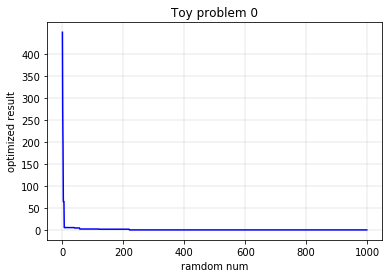

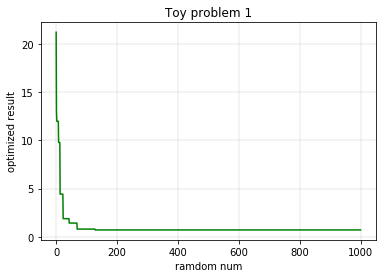

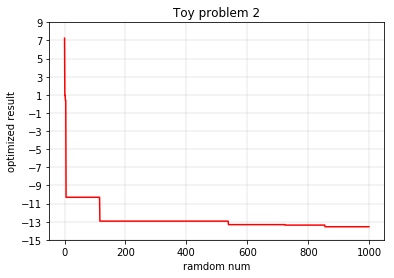

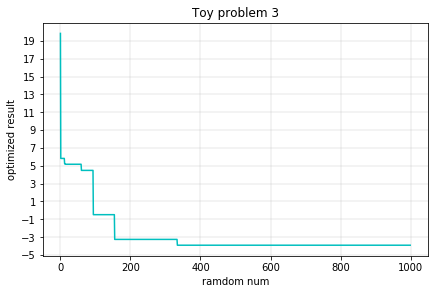

In [6]:
# T1_Q3_BONUS
plt.figure(1)
plt.plot(z_value[0], color = 'b')
plt.title('Toy problem 0')
plt.xlabel('ramdom num')
plt.ylabel('optimized result')
y_ticks = np.arange(0, 450, 50)
plt.yticks(y_ticks)
plt.grid(linewidth = "0.3")

plt.figure(2)
plt.plot(z_value[1], color = 'g')
plt.title('Toy problem 1')
plt.xlabel('ramdom num')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.figure(3)
plt.plot(z_value[2], color = 'r')
plt.title('Toy problem 2')
plt.xlabel('ramdom num')
plt.ylabel('optimized result')
y_ticks = np.arange(-15, 10, 2)
plt.yticks(y_ticks)
plt.grid(linewidth = "0.3")

plt.figure(4)
plt.plot(z_value[3], color = 'c')
plt.title('Toy problem 3')
plt.xlabel('ramdom num')
plt.ylabel('optimized result')
y_ticks = np.arange(-5, 20, 2)
plt.yticks(y_ticks)
plt.grid(linewidth = "0.3")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

*__T1_Q3_BONUS__*<br/>
<li>These figures are based on function values and the selected random numbers. As above mentioned, once the function value of (x(t+1), y(t+1)) is smaller than (x(t), y(t)), we will set it as the optimized value. For each toy function, they all nearly reached the minimum valueat at the end. 

<h2> Task 2, Gradient Descend: </h2>
<ul>
    *In Task 2, you are to implement a gradient descend (or steepest descend) method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(15,15). * <br/>
    Task 2 holds 33 (+7) points overall. <br/>
    
<li>**T2Q1, 11 Points**: Explain in words, concisely. <br/>
How does a gradient based / first-order search work? <br/>
How would you go about implementing gradient descend (or steepest descend) search in code? <br/>
In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using gradient decent?) <br/> </li>

<li>**T2Q2, 11 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T2Q3, 11 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected? Can you come up with explanations for that behavior?</li>
<li>**BONUS, up to 7 Points**: Plot convergence curves, for for example the function value or the step-size and discuss based on those </li>
</ul>

<h3> TIPs: </h3>
<ul>
    <li> The classic approximate differentiation formula, df_dx = (f(x+h) - f(x-h)/(2*h) <br/>
    <li> This method can be sensitive to the scale of h, so play around. <br/>
     </ul> 

*__T2_Q1__* <br/>
<li>(1) How does a gradient based / first-order search work?  <br/>
<ul>Gradient descent is used to obtain stationanry point(local/global minimum). With the calculation of first-order gradient, we'll get the direction of the funtion that we should move on(the opposite direction of the first-order gradient), then use the gradient to update the point to a better position.<br/>
</ul>
<li>(2) How would you go about implementing gradient descend (or steepest descend) search in code?<br/>
<ul>In the GD method, first we should calculate the gradient,i.e. df_dx = (f(x+h) - f(x-h)/(2*h), for the starting point, then use line search to find the best step size that gives minimum value of the objective function. Last, use that step stize and gradient to update the point.<br/>
</ul>
<li>(3)In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using gradient decent?) <br/>
<ul>For gradient descent, it has limitations on multivariate case. If the function is just a convex or concave problem, it'll reach the minima/maxima point. However, in multivariate case, it will just reach the local maxma/minima based on the starting point. On the other hand, if just for convex or concave problem, gradient descent will do far more better job than random search.<br/>

In [7]:
#T2Q2

step_task2_0 = []
step_task2_1 = []
step_task2_2 = []
step_task2_3 = []

def ObjectFunc(pro, step_s, x, y, gx, gy):
    if pro == 0:
        value = toy_problem_0((x - step_s*gx), (y - step_s*gy))
    elif pro == 1:
        value = toy_problem_1((x - step_s*gx), (y - step_s*gy))
    elif pro == 2:
        value = toy_problem_2((x - step_s*gx), (y - step_s*gy))
    else:
        value = toy_problem_3((x - step_s*gx), (y - step_s*gy))
    return value
    
def StepSearch(pro, x, y, g_x, g_y):
    stepsize = 0
    step_search = np.linspace(0, 1, 100)
    min_Objectfunc = ObjectFunc(pro, step_search[0], x, y, g_x, g_y)
    for i in range (len(step_search)):
        new_Objectfunc = ObjectFunc(pro, step_search[i], x, y, g_x, g_y)
        if (new_Objectfunc < min_Objectfunc):
            min_Objectfunc = new_Objectfunc
            stepsize = step_search[i]
    if pro == 0:
        step_task2_0.append(stepsize)
    elif pro == 1:
        step_task2_1.append(stepsize)
    elif pro == 2:
        step_task2_2.append(stepsize)
    else:
        step_task2_3.append(stepsize)
    
    return stepsize        
        
def GradientDescent(problem, x, y):
    h = 0.1
    if problem == 0:
        gradient_x = (toy_problem_0(x+h, y)-toy_problem_0(x-h, y))/(2*h)
        gradient_y = (toy_problem_0(x, y+h)-toy_problem_0(x, y-h))/(2*h)
    elif problem == 1:
        gradient_x = (toy_problem_1(x+h, y)-toy_problem_1(x-h, y))/(2*h)
        gradient_y = (toy_problem_1(x, y+h)-toy_problem_1(x, y-h))/(2*h)
    elif problem == 2:
        gradient_x = (toy_problem_2(x+h, y)-toy_problem_2(x-h, y))/(2*h)
        gradient_y = (toy_problem_2(x, y+h)-toy_problem_2(x, y-h))/(2*h)
    else:
        gradient_x = (toy_problem_3(x+h, y)-toy_problem_3(x-h, y))/(2*h)
        gradient_y = (toy_problem_3(x, y+h)-toy_problem_3(x, y-h))/(2*h)
        
    step = StepSearch(problem, x, y, gradient_x, gradient_y)
    
    x = x - gradient_x*step
    y = y - gradient_y*step
    
    return (x, y)

def CalOptimizedValue(count, x, y):
        if count == 0:
            value = toy_problem_0(x, y)
        elif count == 1:
            value = toy_problem_1(x, y)
        elif count == 2:
            value = toy_problem_2(x, y)
        else:
            value = toy_problem_3(x, y)
            
        return value

In [8]:
#T2Q3
toyproblem = 4
iterations = 50
tolerance = 1e-6
z_task2_0 = []
z_task2_1 = []
z_task2_2 = []
z_task2_3 = []

for count in range(toyproblem):
    x_best = 15
    y_best= 15
    itera = 0
    z_pre = 0
    z_best = CalOptimizedValue(count, x_best, y_best)
    if count == 0:
        z_task2_0.append(z_best)
    elif count == 1:
        z_task2_1.append(z_best)
    elif count == 2:
        z_task2_2.append(z_best)
    else:
        z_task2_3.append(z_best)
    

    while (itera < iterations) and (abs(z_best-z_pre) > tolerance):
        z_best = CalOptimizedValue(count, x_best, y_best)
        z_pre = z_best
        x_best, y_best = GradientDescent(count, x_best, y_best)
        
        z_best = CalOptimizedValue(count, x_best, y_best)
        if count == 0:
            z_task2_0.append(z_best)
        elif count == 1:
            z_task2_1.append(z_best)
        elif count == 2:
            z_task2_2.append(z_best)
        else:
            z_task2_3.append(z_best)
        
        itera+=1
        
    print("This is the toy problem %d" % (count))
    print("--> x = "+ str(x_best))
    print("--> y = " + str(y_best))
    print("--> Optimized value = " + str(z_best))

This is the toy problem 0
--> x = 1.56153053346418e-07
--> y = 1.56153053346418e-07
--> Optimized value = 4.8767552138818525e-14
This is the toy problem 1
--> x = 2.464442724186068e-09
--> y = 2.464442724186068e-09
--> Optimized value = 3.4852483242356343e-09
This is the toy problem 2
--> x = 9.873066880787192
--> y = 9.873066880787192
--> Optimized value = 8.930928759180732e-06
This is the toy problem 3
--> x = 13.06856520189208
--> y = 11.89535830112434
--> Optimized value = 13.81010177826496


*__T2_Q3_question__*<br/>
<li>How does that differ from what you expected? Can you come up with explanations for that behavior?<br/>
Ans: The result is just what I expected. For toy problem 0 and 1, they are just convex problem which we can use first-order GD to find the minimum and we know that all stationary point must be global minima. However, the toy problem 2 and 3 are multivariate cases, which we can just find the local minimum based on the staring point.

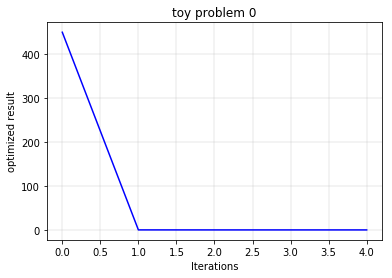

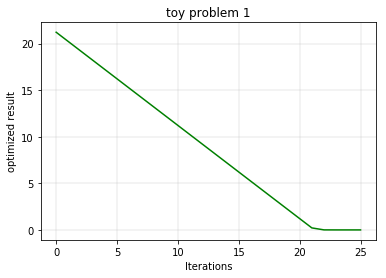

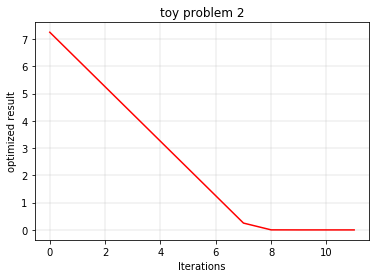

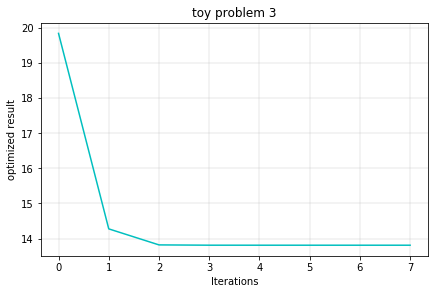

In [9]:
#T2_BONUS
plt.figure(1)
plt.plot(z_task2_0, color = 'b')
plt.title('toy problem 0')
plt.xlabel('Iterations')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.figure(2)
plt.plot(z_task2_1, color = 'g')
plt.title('toy problem 1')
plt.xlabel('Iterations')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.figure(3)
plt.plot(z_task2_2, color = 'r')
plt.title('toy problem 2')
plt.xlabel('Iterations')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.figure(4)
plt.plot(z_task2_3, color = 'c')
plt.title('toy problem 3')
plt.xlabel('Iterations')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

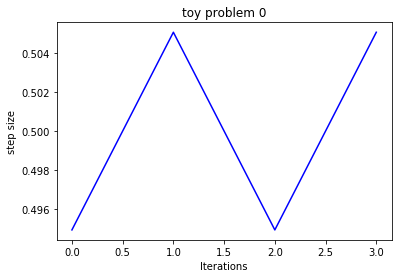

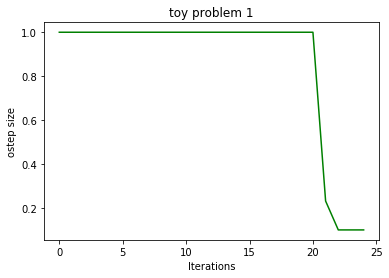

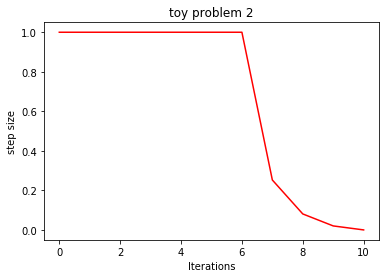

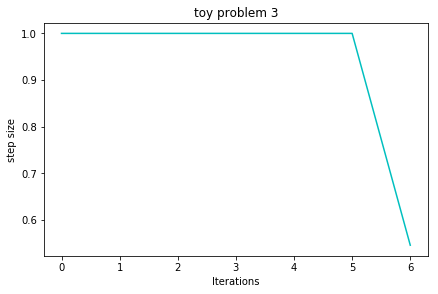

In [10]:
plt.figure(1)
plt.plot(step_task2_0, color = 'b')
plt.title('toy problem 0')
plt.xlabel('Iterations')
plt.ylabel('step size')

plt.figure(2)
plt.plot(step_task2_1, color = 'g')
plt.title('toy problem 1')
plt.xlabel('Iterations')
plt.ylabel('ostep size')

plt.figure(3)
plt.plot(step_task2_2, color = 'r')
plt.title('toy problem 2')
plt.xlabel('Iterations')
plt.ylabel('step size')

plt.figure(4)
plt.plot(step_task2_3, color = 'c')
plt.title('toy problem 3')
plt.xlabel('Iterations')
plt.ylabel('step size')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

*__T2_Q3_BONUS__*<br/>
<li>These figures are based on function values and the iterations. When the subtraction of improved value and previous value is smaller tolerance(1e-6), that means we cannot improve the solution anymore(the gradient is nearly reached zero), then we stopped to update optimized value. We can see that they all reached the local/global minima in 25 iterations(some even far more less than 25). 

### <h2> Task 3, Method 3 </h2>
<ul>
    *In Task 3, you are to implement Newton-Raphson method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(15,15). * <br/>
    Task 3 holds 33 (+7) points overall. <br/>
<li>**T3Q1, 11 Points**: Explain in words, concisely. <br/>
How does a second-order based search work? <br/>
How would you go about implementing Newton-Raphson search in code? <br/>
In context of the 4 toy-problems from Task0, what issues and what benefits do you see expect when Newton-Raphson method?) <br/> </li>
<li>**T3Q2, 11 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T3Q3, 11 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected? Can you come up with explanations for that behavior?</li>
<li>**BONUS, up to 7 Points**: Plot convergence curves, for for example the function value or the step-size and discuss based on those </li>
   </ul> 
<h3> TIPs: </h3>
<ul>
    <li> Reasonably good approximating of the Hessian can be obtained with smart re-use of the classic approximative differentiation formula, df_dx = (f(x+h) - f(x-h)/(2*h) <br/>
    <li> For Newton method, an inverse of Hessian is needed. It is recommended to use numpy.linalg.pinv OVER numpy.linalg.inv, due to stability reasons. <br/>
    <li> This method will be very sensitive to the scale of h, so play around. <br/>
    <li> The performance of this method may be surprisingly good or bad, depending on the problem. Make sure you know what to expect! <br/>
     </ul> 

*__T3_Q1__* <br/>
<li>(1) How does a second-order based search work?   <br/>
<ul>The second gradient descent is to calculate the Hessian marix, which is second-order differenttiation. In the process of optimization, it uses the first derivative function and the second derivative of the function to find the root. Update the function x(t+1) = x(t) - g'(x)/g''(x), where g''(x) is Hessian matrix. The updated x(t+1) is used as a new iteration point, and the process is repeated until the best value is found.<br/>
</ul>
<li>(2) How would you go about implementing Newton-Raphson search in code? <br/>
<ul>Since Hessian metrix is hard to compute and time-consuming, here I will use quasi-method(mentioned in the course ppt) to approximate it. There is a lot of method for quasi-newton, and "symmetric rank one correction" is the method I will use to approximate Hessian matrix. For quasi-method, the difference from GD is the updated rule, x(n+1) = x(n) - stepsize*InverseofHessian*gradient. To update Hessian matrix, the correction of Hessian comes from rank one correction, H(k+1) = H(k) + (v(k)*v(k).T)/v(k).T*y(k). Where v(k) = s(k) - H(k)*y(k), s(k) = x(k+1) - x(k), y(k) = g_x(k+1) -  g_x(k). The initial matrix of Hessian is a identity matrix.<br/>
The formula comes from:<br/>
<ul>(1) H(k+1) = H(k) + E(k) = H(k) + u*v.T<br/>
      (2) s(k) = x(k+1) - x(k), y(k) = g_x(k+1) -  g_x(k)<br/>
      (3) H(k+1)*y(k) = [H(k) + u*v.T]*y(k) = s(k)<br/>
      (4) [v.T*y(k)]*u = s(k) - H(k)*y(k)<br/>
      (5) u = [s(k) - H(k)*y(k)] / [v.T*y(k)]<br/>
      (6) Insert (5) to (1) where v(k) = s(k) - H(k)*y(k)<br/>
      (7) Hessian update: H(k) + (v(k)*v(k).T)/v(k).T*y(k)<br/>
</ul>
</ul>
<li>(3)In context of the 4 toy-problems from Task0, what issues and what benefits do you see expect when Newton-Raphson method?  <br/>
<ul>I expect that Newton can find the minima value for toy problem 0. On the other hand, although H(k) symmetric, it might not be positive define. If v(k).T*y(k) is nearly zero, Hessian might be unstable. Which means for toy problem 1, 2, 3, the final optimized value might not be good.<br/>

In [11]:
#T3Q2
def ObjectFunc(pro, step_s, x, g_k, h_k):
    d = -1.0*np.dot(h_k, g_k)
    x = x + step_s*d
    if pro == 0:
        value = toy_problem_0(x[0][0], x[1][0])
    elif pro == 1:
        value = toy_problem_1(x[0][0], x[1][0])
    elif pro == 2:
        value = toy_problem_2(x[0][0], x[1][0])
    else:
        value = toy_problem_3(x[0][0], x[1][0])
    return value
    
#def StepSearch(pro, x, y, g_x, g_y):
def StepSearch(pro, x, gk, hk):
    stepsize = 0
    step_search = np.linspace(0, 1, 100)
    min_Objectfunc = ObjectFunc(pro, step_search[0], x, gk, hk)
    for i in range (len(step_search)):
        new_Objectfunc = ObjectFunc(pro, step_search[i], x, gk, hk)
        if (new_Objectfunc < min_Objectfunc):
            min_Objectfunc = new_Objectfunc
            stepsize = step_search[i]
    return stepsize        

def FirstGrad(pro, x0, x1):
    grad = np.zeros((2,1))
    h = 0.1
    if pro == 0:
        gradient_x = (toy_problem_0(x0+h, x1)-toy_problem_0(x0-h, x1))/(2*h)
        gradient_y = (toy_problem_0(x0, x1+h)-toy_problem_0(x0, x1-h))/(2*h)
    elif pro == 1:
        gradient_x = (toy_problem_1(x0+h, x1)-toy_problem_1(x0-h, x1))/(2*h)
        gradient_y = (toy_problem_1(x0, x1+h)-toy_problem_1(x0, x1-h))/(2*h)
    elif pro == 2:
        gradient_x = (toy_problem_2(x0+h, x1)-toy_problem_2(x0-h, x1))/(2*h)
        gradient_y = (toy_problem_2(x0, x1+h)-toy_problem_2(x0, x1-h))/(2*h)
    else:
        gradient_x = (toy_problem_3(x0+h, x1)-toy_problem_3(x0-h, x1))/(2*h)
        gradient_y = (toy_problem_3(x0, x1+h)-toy_problem_3(x0, x1-h))/(2*h)
    
    grad[0][0] = gradient_x
    grad[1][0] = gradient_y

    return grad

def Hessian(x_pre, x, gk_pre, gk, Hk_pre):
    sk = x - x_pre
    yk = gk - gk_pre
    v = sk - np.dot(Hk_pre, yk)
    hess = Hk_pre + np.dot(v, v.T)/np.dot(v.T, yk)

    return hess

def CalculateOptimizedValue(pro, x):
    if pro == 0:
        zz = toy_problem_0(x[0][0], x[1][0])
    elif pro == 1:
        zz = toy_problem_1(x[0][0], x[1][0])
    elif pro == 2:
        zz = toy_problem_2(x[0][0], x[1][0])
    else:
        zz = toy_problem_3(x[0][0], x[1][0])
        
    return zz
    
def QuasiNewton(pro, x):
    tolerance = 1e-10
    iteration = 1000
    itera = 0
    z_pre = 0
    
    if pro == 0:
        z_task3_0.append(CalculateOptimizedValue(pro, x))
    elif pro == 1:
        z_task3_1.append(CalculateOptimizedValue(pro, x))
    elif pro == 2:
        z_task3_2.append(CalculateOptimizedValue(pro, x))
    else:
        z_task3_3.append(CalculateOptimizedValue(pro, x))
    
    Hk = np.eye(2)
    gk = FirstGrad(pro, x[0][0], x[1][0])
    
    dk = -1.0*np.dot(Hk, gk)
    x_pre = x
    step = StepSearch(pro, x, gk, Hk)
    x = x + step*dk
    z_best = CalculateOptimizedValue(pro, x)
    
    if pro == 0:
        z_task3_0.append(z_best)
    elif pro == 1:
        z_task3_1.append(z_best)
    elif pro == 2:
        z_task3_2.append(z_best)
    else:
        z_task3_3.append(z_best)
    
    while (itera < iteration) and (abs(z_best-z_pre) > tolerance):
        Hk_pre = Hk
        gk_pre = gk
        gk = FirstGrad(pro, x[0][0], x[1][0])
        Hk = Hessian(x_pre, x, gk_pre, gk, Hk_pre)
        dk = -1.0*np.dot(Hk, gk)
        x_pre = x
        step = StepSearch(pro, x, gk, Hk)
        x = x + step*dk
        z_pre = z_best
        z_best = CalculateOptimizedValue(pro, x)
        
        if pro == 0:
            z_task3_0.append(z_best)
        elif pro == 1:
            z_task3_1.append(z_best)
        elif pro == 2:
            z_task3_2.append(z_best)
        else:
            z_task3_3.append(z_best)
        
        itera += 1
        
    return x

In [12]:
# T3Q3
problem = 4
z_task3_0 = []
z_task3_1 = []
z_task3_2 = []
z_task3_3 = []

for i in range(problem): 
    x = np.zeros((2,1))
    x[0][0] = 15
    x[1][0] = 15
    x_best = QuasiNewton(i, x)

    z_best = CalculateOptimizedValue(i, x_best)
    
    print("This is toy problem %d" % (i))    
    print("x = %f, y = %f, Optimized value = %f" % (float(x_best[0][0]), float(x_best[1][0]), float(z_best)))  

This is toy problem 0
x = 0.000000, y = 0.000000, Optimized value = 0.000000
This is toy problem 1
x = 14.292897, y = 14.292897, Optimized value = 20.213209
This is toy problem 2
x = 14.292897, y = 14.292897, Optimized value = 6.250575
This is toy problem 3
x = 13.068145, y = 11.895122, Optimized value = 13.810102


*__T3_Q3_question__*<br/>
<li>How does that differ from what you expected? Can you come up with explanations for that behavior?<br/>
Ans: For toy problem 0, Newton's method did pretty well on finding the minima. However, for toy problem 2 and 3, v(k).T*y(k) is nearly zero from first iteration, which the Hessian matrix is unstable and cannot do anymore iterations based on that. For toy problem 3, the Hessian matrix is not unstable and it just reach the local minimua.

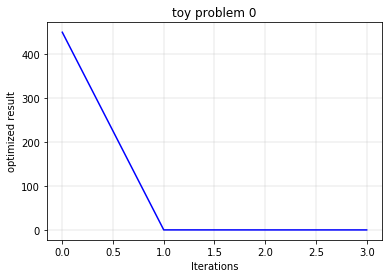

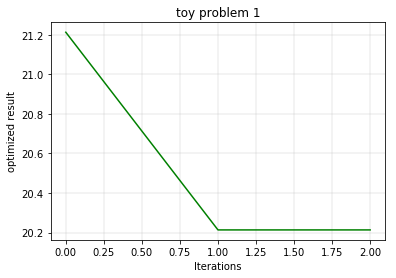

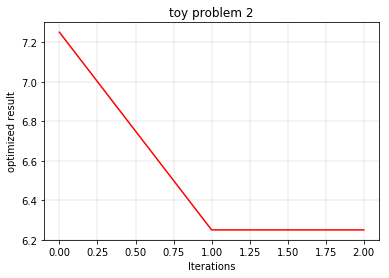

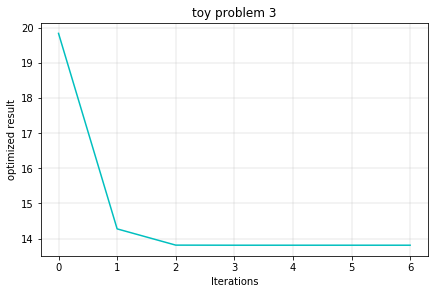

In [13]:
#T3_BONUS
plt.figure(1)
plt.plot(z_task3_0, color = 'b')
plt.title('toy problem 0')
plt.xlabel('Iterations')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.figure(2)
plt.plot(z_task3_1, color = 'g')
plt.title('toy problem 1')
plt.xlabel('Iterations')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.figure(3)
plt.plot(z_task3_2, color = 'r')
plt.title('toy problem 2')
plt.xlabel('Iterations')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.figure(4)
plt.plot(z_task3_3, color = 'c')
plt.title('toy problem 3')
plt.xlabel('Iterations')
plt.ylabel('optimized result')
plt.grid(linewidth = "0.3")

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)